In [1]:
import pandas as pd


In [3]:
trx = pd.read_csv("ejemplo_trx.csv")

In [5]:
trx.columns

Index(['block_hash', 'block_number', 'block_timestamp', 'transaction_hash',
       'transaction_index', 'nonce', 'from_address', 'to_address', 'value',
       'value_lossless', 'gas', 'gas_price', 'input', 'max_fee_per_gas',
       'max_priority_fee_per_gas', 'transaction_type', 'chain_id',
       'access_list', 'r', 's', 'v', 'y_parity'],
      dtype='object')

In [11]:
addresses = set()
(trx[["from_address", "to_address"]].apply(lambda x: addresses.add(x.from_address) and addresses.add(x.to_address), axis=1))

0       None
1       None
2       None
3       None
4       None
        ... 
3467    None
3468    None
3469    None
3470    None
3471    None
Length: 3472, dtype: object

In [14]:
len(addresses)

2769

In [16]:
import networkx as nx

In [17]:
g=nx.Graph()

In [18]:
def armar_grafo(frm, to, g):
    g.add_node(frm)
    g.add_node(to)
    g.add_edge(frm, to)

In [20]:
trx[["from_address", "to_address"]].apply(lambda x: armar_grafo(x.from_address, x.to_address,g ), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
3467    None
3468    None
3469    None
3470    None
3471    None
Length: 3472, dtype: object

In [23]:
import matplotlib.pyplot as plt

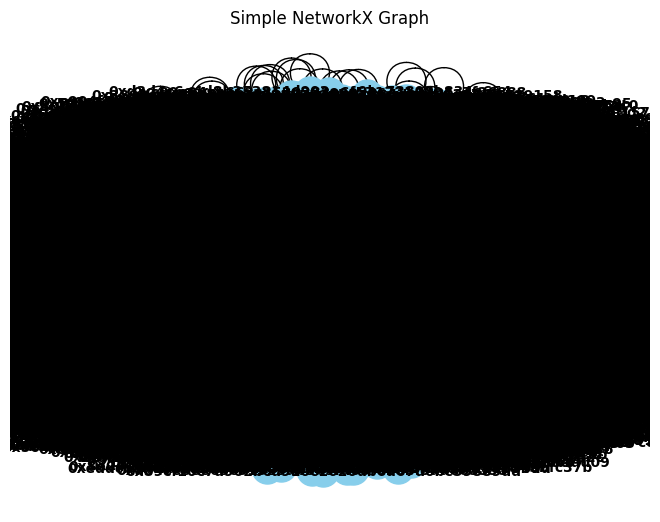

In [28]:
pos = nx.spring_layout(g)  
nx.draw(g, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.title("Simple NetworkX Graph")
plt.show()

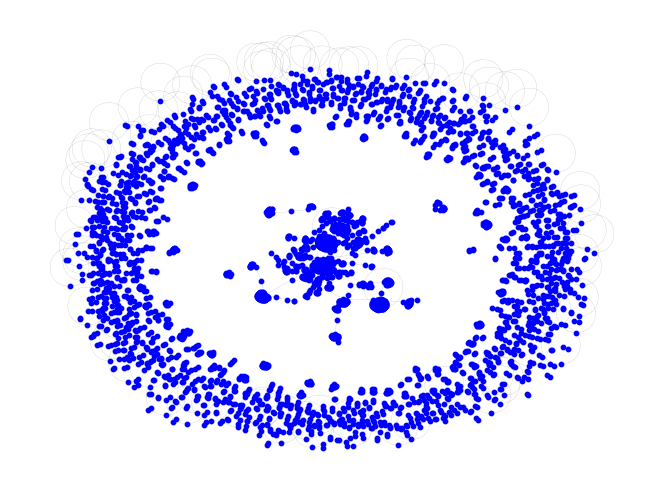

In [29]:
node_size = 10  # Tamaño de los nodos
node_color = 'b'  # Color de los nodos
edge_width = 0.1  # Grosor de los enlaces
edge_color = 'gray'  # Color de los enlaces

# Dibujar el grafo
nx.draw(g, pos, node_size=node_size, node_color=node_color, width=edge_width, edge_color=edge_color, with_labels=False)

# Mostrar la visualización
plt.axis('off')  # Ocultar ejes
plt.show()
